# Homework 3

## Face Recognition Using SVM:

In [1]:
# Importing libraries and packages:

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

### a- Download the dataset "Face"

In [2]:
# "read_csv" is a pandas function to read csv files from web or local device:

face_df = pd.read_csv('https://raw.githubusercontent.com/ellipsclamation/cs5661_data_science/master/Datasets/Face/label.csv')

# checking the dataset by printing 15 lines:
face_df.head(15)

,Label
0,13
1,30
2,34
3,19
4,24
5,6
6,15
7,26
8,14
9,21


### Open some of the jpg images

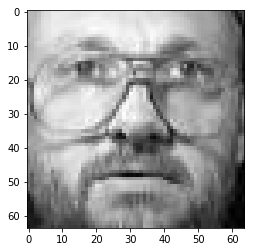

In [3]:
path = '.\\Datasets\\Face\\'
file_name = path + '0.jpg'

image = mpimg.imread(file_name)
plt.imshow(image, cmap=plt.cm.gray)

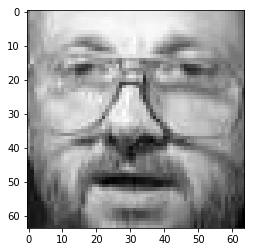

In [4]:
file_name = path + '11.jpg'

image2 = mpimg.imread(file_name)
plt.imshow(image2, cmap=plt.cm.gray)

### b- Build the feature matrix and label vector
Each image is considered as a data sample with
pixels as features. Thus, to build the feature table you have to convert each 64x64 image into
a row of the feature matrix with 4096 columns.

In [5]:
feature_matrix = []

for filename in range(0, face_df.size):
    image = mpimg.imread(path + str(filename) + '.jpg')
    feature_matrix.append(image.flatten())
    
feature_matrix = np.asarray(feature_matrix)
print(feature_matrix.shape)
print(feature_matrix)

(400, 4096)
[[186 183 179 ...,   9   3   5]
 [204 198 194 ..., 120 164 167]
 [ 86  79  82 ..., 189 185 141]
 ..., 
 [163 177 193 ...,  44  48  53]
 [145 147 151 ..., 132 114 117]
 [ 91  74  66 ...,  75  44  46]]


### c- Normalize each column of your feature matrix

In [6]:
# normalized_feature_matrix = feature_matrix / feature_matrix.max(axis=0)
# print(normalized_feature_matrix)

from sklearn import preprocessing
normalized_feature_matrix = preprocessing.scale(feature_matrix)
print(normalized_feature_matrix)

[[ 1.37649641  1.11885303  0.79610373 ..., -1.17094622 -1.24726506
  -1.21711982]
 [ 1.68113398  1.3654141   1.03570156 ...,  0.68710075  1.48558299
   1.58234648]
 [-0.31593455 -0.59063704 -0.75329558 ...,  1.84210291  1.84204144
   1.13304942]
 ..., 
 [ 0.98723729  1.02022861  1.01972837 ..., -0.58507555 -0.48342554
  -0.38764832]
 [ 0.68259971  0.52710647  0.34885444 ...,  0.88797069  0.63687242
   0.71831368]
 [-0.231313   -0.67282406 -1.0088666  ..., -0.06616154 -0.55132239
  -0.50861291]]


D:\_programming\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


### d- Use sklearn functions to split the Normalized dataset into testing and training sets with the following parameters:
- test_size=0.25
- random_state=5.

In [7]:
# Select features from the normalized np array
X = normalized_feature_matrix

# Select label from the dataframe
y = face_df['Label']

In [8]:
# Randomly splitting the original dataset into training set and testing set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)

# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

(300, 4096)
(300,)
(100, 4096)
(100,)


### e- The dimensionality of the data samples is 4096. Use PCA to reduce the dimensionality from 4096 to 50.
You should "fit" your PCA on your training set only, and then use this fitted model to "transform" both training and testing sets

In [9]:
from sklearn.decomposition import PCA
k = 50 # (k is the number of components (new features) after dimensionality reduction)
my_pca = PCA(n_components = k)
# X_train is feature matrix of training set before dimensionality reduction,
# X_train_New is feature matrix of training set after dimensionality reduction:
X_train_new = my_pca. fit_transform(X_train)
X_test_new = my_pca. transform(X_test)

### f- Design and Train a non-linear SVM classifier to recognize the face based on the training dataset
Use
- SVC(C=1, kernel='rbf', gamma=0.0005, random_state=1)

Then, test your SVM on testing set and calculate and report the accuraccy. Also, calculate and report the confusion matrix.

In [10]:
from sklearn.svm import SVC

my_SVC = SVC(C=1, kernel='rbf', gamma=0.0005, random_state=1)

#### Training Stage: Training a predictive model using the training dataset:

In [11]:
# Training ONLY on the training set:
my_SVC.fit(X_train_new, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0005, kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

#### Testing (Prediction) Stage: Making prediction on new observations (Testing Data) using the trained model:

In [12]:
# Testing on the testing set:
y_predict_SVC = my_SVC.predict(X_test_new)
print(y_predict_SVC)

[16 32 39 22 29 38 21 12 23 28  9 13 29 21 10  1 36 11 39 25  8 26 19 12 35
  7 21 20  8 14  7 33 23  0 20  1 38 25  8 23 39  2 10 13 38 25 26 18  4 36
 26 17 13 16 38 36  4 36  5  6 14  9 13  7  9 22  6  6 24  0  4 31 31 37 14
 22 16 34 11 15 15  0  2 25  5 34 11 18 22 11 12  1 16 24 36 33 32 13 38 20]


#### Accuracy Evaluation:

In [13]:
# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 

score_SVC = accuracy_score(y_test, y_predict_SVC)
print(score_SVC)

0.91


#### Confusion Matrix

In [14]:
cm_SVC = metrics.confusion_matrix(y_test, y_predict_SVC)

print("Confusion matrix:")
print(cm_SVC)

Confusion matrix:
[[3 0 0 ..., 0 0 0]
 [0 3 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 4 0]
 [0 0 0 ..., 0 0 1]]


### g- Now use GridSearchCV to find the best value for parameter C in your SVM
search this list
- [0.1, 1, 10, 100, 1e3, 5e3, 1e4, 5e4, 1e5]

Remember that we want to use cross-validation method (GridSearchCV) to find the best C.

Thus, you can again merge X_train_new and X_test_new (after dimensionality reduction), and also merge y_train and y_test, and then use GridSearchCV with 10-fold cross validation to find C.

In [15]:
param_grid = dict(C = [0.1, 1, 10, 100, 1e3, 5e3, 1e4, 5e4, 1e5])

# create the grid, and define the metric for evaluating the model:
grid = GridSearchCV(SVC(kernel='rbf', gamma=0.0005, random_state=1), param_grid, cv=10, scoring='accuracy')

# fit the grid (start the grid search):
grid.fit(X, y)

# view the best results corresponding to the best C in SVC:
print('best accuracy: %f' % (grid.best_score_))
print('best C: %s' % (grid.best_params_))

best accuracy: 0.965000
best C: {'C': 10}
